# **Technical Tool Document: Demonstrating Transparency with User’s Time.**


# Abstract Visualisation
An abstract of this tool’s pipeline is shown below. This pipeline demonstrates the exact inputs and outputs of this tool, and specifically which sections will be technically implemented and which sections will only be discussed in pseudo terms.

This diagram is specifically how the implementation has been broken down, and pseudo solutions exist for each of these three parts.


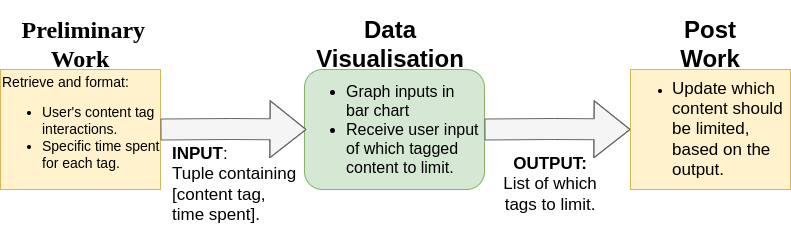

# Pseudo solutions
Some sections of implementations require a functioning social media to be fully implemented: which has been identified as beyond the scope of the project. Hence, parts of the tool's functionality which are dependent on a social media platform will only be partially implemented through design techniques: specifically pseudocode. 
As shown in the pipeline diagram above in yellow, these are the sections which will have pseudo solutions.

## Preliminary Work
To gather the user data of both tagged content and time watched, a platform would need to specifically know the points when a user has initiated and ceased interacting with content, as well as know the content's tag. At these points a call to specific functions to record timings could be made, to record the time when the user started interacting, and when the user has stopped interacting. This time recorded can then be added to the total time for the specific tag of the content interacted with.
As an example for video content, when a video begins to play it will extract the content tag and record the time, and when a user pauses or unloads the video, it will deduce the time taken during the interaction and add the time recorded to the total sum for that tag. 

An abstract, pseudo solution in python is shown below, which simulates content being watched and how the timings could potentially be recorded:

In [ ]:
#The python 'time' library is used to record the time spent viewing content types.
import time

In [ ]:
#A function that will update the timings variable accordingly, given a list of name tags and time to add
def updateTimings(contentTags, time):
  #Retrieve only the tag names from timings
  storedTags = [tags[0] for tags in timings]

  #For each tag...
  for tag in contentTags:
    #If the timings does not contain time data for the current tag, add it.
    if (tag not in storedTags):
      timings.append((tag, time))
      #Update storedTags
      storedTags = [tags[0] for tags in timings]
      
    #Otherwise, update the existing time
    else:
      tagIndex = storedTags.index(tag)
      newTime = timings[tagIndex][1] + time
      timings[tagIndex] = (tag, newTime)

In [ ]:
#A function that simulates content being viewed, when given a tag name and the time spent interacting with the content
#For a real implementation, this would be called when the content is loaded on screen, for example.
def SimulateContent(contentTags, timeAmount):
  #Get the current time before the content is shown
  t0 = time.time()

  #wait a given number of seconds to simulate time spent 'Viewing' content
  time.sleep(timeAmount)

  #Compute the time spent viewing the content
  timeSpent = time.time() - t0
  
  #Append the time spent to the existing timing records
  updateTimings(contentTags, timeSpent)

###**Demonstrating the Preliminary Work Pseudosolution**
To demonstrate the above solution of gathering timings, different types of content is 'viewed' of different lengths of time, and these content tag timings will be stored. The resulting timings of this simulation is printed to the terminal.

In [ ]:
#To store the time spent for each type of content, consisting of double tuples of the format (Content Type, Time Spent)
#This variable will need to be stored consistently, as it requires updating.
timings = []

#Simulate viewing different types of tagged content for different lengths of time
SimulateContent(['Gaming', 'Cooking', 'Fantasy'], 6)
SimulateContent(['Cooking'], 8)
SimulateContent(["Gaming"], 14)
SimulateContent(["Gaming", "Cooking", "Fantasy", "Science"], 4)

#Print the resulting timings
print(timings)

[('Gaming', 24.021041870117188), ('Cooking', 18.01754927635193), ('Fantasy', 10.009446859359741), ('Science', 4.004104852676392)]


As shown, the resulting list contains the total time spent viewing content relating to each tag, and can then be visualized.

 This solution can be extended to an existing system by simply having the 'SimulateContent' operate around every piece of content being interacted with, and storing the timings correctly when the content is finished viewing.

##Data Visualisation and Interaction

In [ ]:
#The python 'pyplot' libray is used to demonstrate how timings can be visualized.
import matplotlib.pyplot as plt

#A function that takes the timings as an input and plots them as a bar chart appropriately
def plotTimes(tagTimings):
  #Sort the Timings to be largest to smallest
  tagTimings.sort(key = lambda x: x[1], reverse = True)

  #Gather a list of both tags, and times respectively
  tags = [tags[0] for tags in tagTimings]
  times = [times[1] for times in tagTimings]

  #Compute the colour scheme
  colourValues = [float(i)/max(times) for i in times]
  colours = []
  for i in range(len(tags)):
    colours.append([colourValues[i], 0, 0])

  #Visualise the Data
  fig = plt.figure(figsize=(2*len(tags), 10))
  ax = fig.add_axes([0,0,1,1])
  ax.bar(tags, times, color = colours)
  plt.xticks(rotation=20, size=20)
  plt.yticks(size=20)
  plt.show()

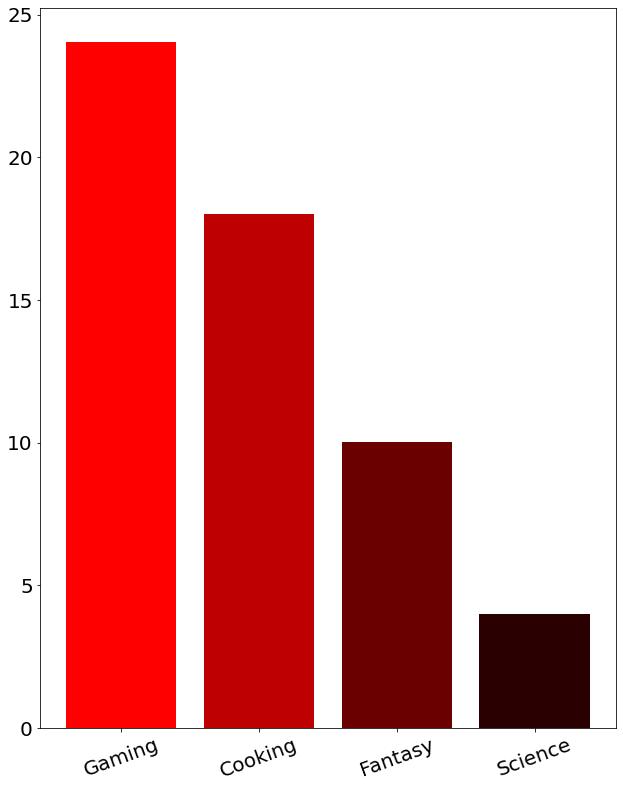

In [ ]:
plotTimes(timings)

From this visualisation, the user can then decide on which content tag they want to reduce their exposure to. In an actual implementation, the users choice could be collected a numerous number of ways, but for the sake of demonstration, a possible input collection method is presented below: a dropdown box.

In [ ]:
ContentToHalt = "Gaming" #@param ["Gaming", "Cooking", "Fantasy", "Science"]
print(ContentToHalt)

Gaming


Fundamentally, a user's choice can be obtained as long as every content tag that has been visualized is in some state to be 'selected'. A list of alternatives include:

`Check Boxes` - Offer a screen of check boxes to the user, so the user may select and halt exposure to multiple content tags at a time.

`Interactable Visualization` - A more advanced solution would be to provide a more interactable visualisation, in which the user may select or hover over bars to gain more insight into their information, and select which tag to halt by selecting the appropriate bar. This solution may suit a mobile social media platform, as a touchscreen may be better suited for a user's input.

## Post Work


The post work from this visualisation is acted upon the user's choice of which content to limit. Upon receiving which tags the user wishes to reduce, the platform would need to have a means of reducing this content for this specific user.

This could be performed in numerous ways with different levels of complexity:

`Do Not Show the Content` - A simple to implement but perhaps excessive solution would be to simply not show *any* content that has a tag that matches what a user has deemed not to show. This would simply mean that before showing content, simply check its tags and if any match the stored list of 'do not show' and if so, do not show the content. 

This solution has the danger of excessively reducing a user's quality of time on a platform, as it is obvious they enjoy content they have watched a lot of, so removing this content may be an excessive action.

`Inform the Recommender System` - A solution more respective of a user's time but more complicated to implement would be to use the user's limitation choices to inform the bias of any existing recommender system. For example, a recommender system will decide what type of content to display to a user based on their existing interests, so this system can take their choice into consideration when choosing which content to recommend on a platform: specifically limiting content with specific limited tags to appear less. 

This solution is less absolute than not showing the content, as it instead makes the content less likely to appear and better utilises the existence of a recommender system within a platform.